# FaceCheck: AI Detection 
*Author: Andy Shen*

## Overview

In today's digital world, anyone can manipulate images and videos with relative ease. Distinguishing real faces from AI-generated ones has become increasingly crucial. 


FaceCheck is a AI image classifier that is trained on 1000 fake and real images to discern genuine faces from a synthetic one. 

## Business Problem

There is a variety of problems that comes with facial image fabrication.

- Misinformation: Deepfakes can be used to fabricate news or spread fake news for political gain
- Financial fraud: Fake identities can be used to commit identity theft, open fraudulent accounts, and bypass security measures.
- Manipulation: Fake identities can be used to impersonal individuals and deceive audiences

FaceCheck equips individuals with the ability to detect and verify faces. FaceCheck will allow users to:

- Verify the authenticity of online profiles and interactions.
- Protect themselves from online scams and phishing attempts.
- Contribute to a safer and reliable online experience

## Data Understanding

The dataset comes from https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection/ .

In [15]:
## Imports
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras import models
from keras import layers
from keras import optimizers

import random
import PIL
import pickle 
import cv2

In [17]:
os.listdir('data/')

['training_fake', 'training_real']

In [16]:
#Directory Path
real = "data/training_real/"
fake = "data/training_fake/"

real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [57]:
categories = ['Real', 'AIGenerated']

### Visualizing Our Data

In [17]:
## function for loading image
def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image,(224, 224))
    return image[...,::-1]

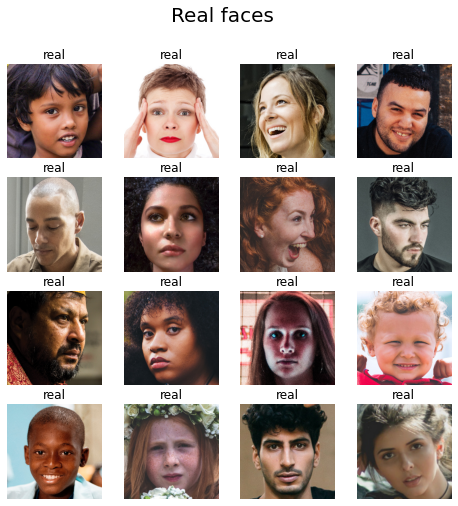

In [18]:
fig = plt.figure(figsize=(8,8))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(real + real_path[i]), cmap='gray')
    plt.suptitle("Real faces",fontsize=20)
    plt.title('real')
    plt.axis('off')

plt.show()

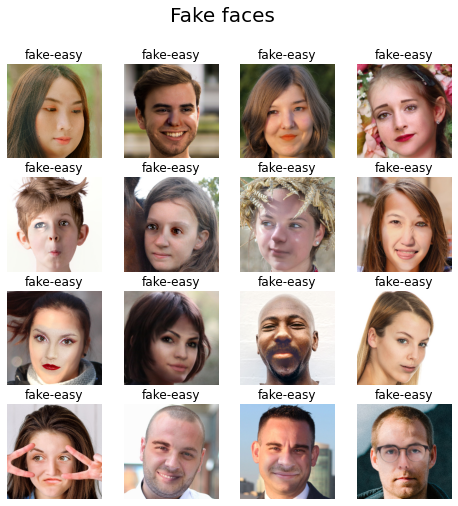

In [19]:
fig = plt.figure(figsize=(8,8))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(fake + fake_path[i]), cmap='gray')
    plt.suptitle("Fake faces",fontsize=20)
    plt.title('fake-'+ fake_path[i][:4])
    plt.axis('off')

plt.show()

In [20]:
dataset_path = "../AI-Facial-Detection/data/"

In [21]:
data_with_aug = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                  validation_split=0.2)

In [45]:
train_generator = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="training")

Found 1633 images belonging to 2 classes.


In [47]:
val_generator = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="validation"
                                          )

Found 408 images belonging to 2 classes.


In [83]:
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)

# Modeling

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D

### Baseline model

In [48]:
model1 = Sequential([
    Flatten(input_shape=(96,96,3)),  # Flatten the 2D image
    Dense(128, activation='relu'),  # Dense layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit)
])

In [49]:
model1.layers[0].trainable = False
model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 27648)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               3539072   
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 3,540,362
Trainable params: 3,540,362
Non-trainable params: 0
_________________________________________________________________


In [50]:
hist0 = model1.fit_generator(train_generator,
                    epochs=20,
                    callbacks=[lr_callbacks],
                    validation_data=val_generator)

Epoch 1/20
52/52 [==============================] - 31s 604ms/step - loss: 8.6180 - accuracy: 0.5273 - val_loss: 6.4319 - val_accuracy: 0.4804
Epoch 2/20
52/52 [==============================] - 21s 411ms/step - loss: 2.6611 - accuracy: 0.5738 - val_loss: 1.5048 - val_accuracy: 0.5441
Epoch 3/20
52/52 [==============================] - 20s 393ms/step - loss: 3.3402 - accuracy: 0.5407 - val_loss: 3.6745 - val_accuracy: 0.5245
Epoch 4/20
52/52 [==============================] - 21s 413ms/step - loss: 1.1558 - accuracy: 0.6271 - val_loss: 1.2414 - val_accuracy: 0.5221
Epoch 5/20
52/52 [==============================] - 20s 392ms/step - loss: 0.8570 - accuracy: 0.6552 - val_loss: 1.2369 - val_accuracy: 0.5098
Epoch 6/20
52/52 [==============================] - 21s 396ms/step - loss: 0.8568 - accuracy: 0.6301 - val_loss: 0.9898 - val_accuracy: 0.5686
Epoch 7/20
52/52 [==============================] - 20s 388ms/step - loss: 0.7369 - accuracy: 0.6681 - val_loss: 0.9677 - val_accuracy: 0.5294

### Visualization for Base Model:

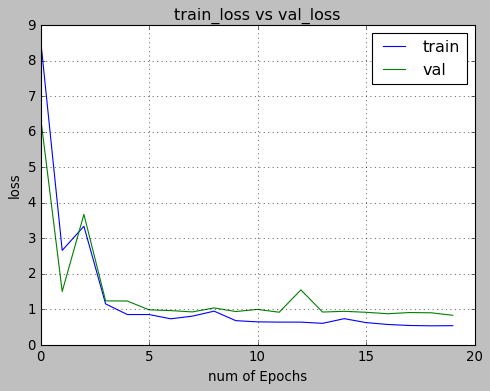

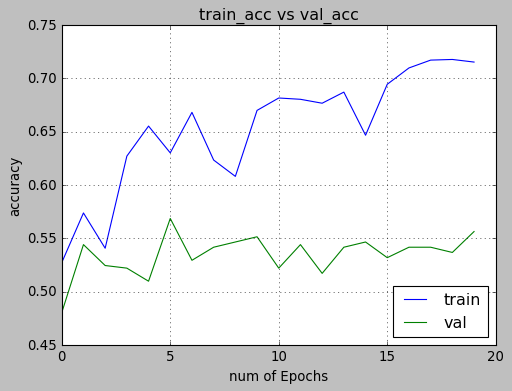

In [51]:
epochs = 20
train_loss = hist0.history['loss']
val_loss = hist0.history['val_loss']
train_acc = hist0.history['accuracy']
val_acc = hist0.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

### MobileNetV2 Model:

In [7]:
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D

In [5]:
mnet = MobileNetV2(include_top = False, weights = "imagenet" ,input_shape=(96,96,3))

9412608/9406464 [==============================] - 0s 0us/step


In [9]:
tf.keras.backend.clear_session()

model2 = Sequential([mnet,
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "relu"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "relu"),
                    Dropout(0.1),
                    # Dense(32, activation = "relu"),
                    # Dropout(0.3),
                    Dense(2, activation = "softmax")])

model2.layers[0].trainable = False

model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Functio (None, 3, 3, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               655872    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [10]:
# Callbacks

def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [26]:
hist2 = model2.fit_generator(train_generator,
                    epochs=20,
                    callbacks=[lr_callbacks],
                    validation_data=val_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
52/52 [==============================] - 53s 1s/step - loss: 0.8840 - accuracy: 0.5964 - val_loss: 0.8538 - val_accuracy: 0.5368
Epoch 2/20
52/52 [==============================] - 25s 473ms/step - loss: 0.5774 - accuracy: 0.7103 - val_loss: 0.9248 - val_accuracy: 0.5417
Epoch 3/20
52/52 [==============================] - 27s 526ms/step - loss: 0.4732 - accuracy: 0.7655 - val_loss: 0.9728 - val_accuracy: 0.5368
Epoch 4/20
52/52 [==============================] - 31s 601ms/step - loss: 0.3565 - accuracy: 0.8500 - val_loss: 0.9798 - val_accuracy: 0.5000
Epoch 5/20
52/52 [==============================] - 25s 490ms/step - loss: 0.3457 - accuracy: 0.8536 - val_loss: 0.9892 - val_accuracy: 0.5098
Epoch 6/20
52/52 [==============================] - 23s 436ms/step - loss: 0.3210 - accuracy: 0.8690 - val_loss: 1.0561 - val_accuracy: 0.4902
Epoch 7/20
52/52 [==============================] - 23s 434ms/step - 

### Visualization for MobileNetV2


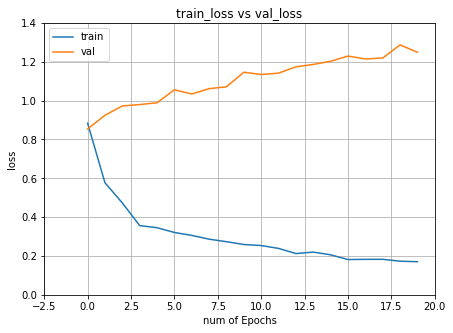

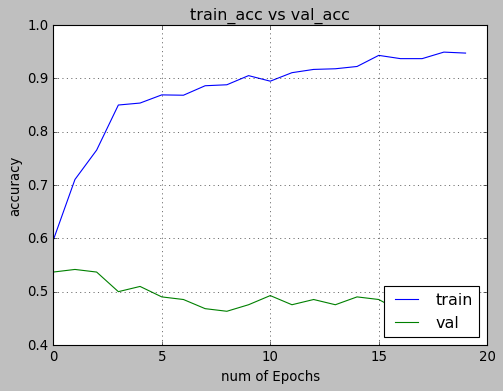

In [27]:
epochs = 20
train_loss = hist2.history['loss']
val_loss = hist2.history['val_loss']
train_acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

### VGG16 Model

In [28]:
train_generator = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=98,
                                          subset="training")

val_generator = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=98,
                                          subset="validation"
                                          )

Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [29]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))

58892288/58889256 [==============================] - 2s 0us/step


In [33]:
model3 = Sequential([vgg16_model,
                    Flatten(),
#                     GlobalAveragePooling2D(),
#                     Dense(512, activation = "relu"),
#                     BatchNormalization(),
#                     Dropout(0.3),
#                     Dense(128, activation = "relu"),
#                     Dropout(0.1),
#                     # Dense(32, activation = "relu"),
#                     # Dropout(0.3),
                    Dense(2, activation = "softmax")])

model3.layers[0].trainable = False

model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 50178     
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [34]:
hist3 =  model.fit_generator(train_generator,
                    epochs=20,
                    callbacks=[lr_callbacks],
                    validation_data=val_generator)

Epoch 1/20
17/17 [==============================] - 37s 2s/step - loss: 0.9460 - accuracy: 0.5818 - val_loss: 0.9121 - val_accuracy: 0.5515
Epoch 2/20
17/17 [==============================] - 36s 2s/step - loss: 0.6131 - accuracy: 0.7055 - val_loss: 0.7690 - val_accuracy: 0.5343
Epoch 3/20
17/17 [==============================] - 35s 2s/step - loss: 0.5001 - accuracy: 0.7551 - val_loss: 0.8326 - val_accuracy: 0.5221
Epoch 4/20
17/17 [==============================] - 35s 2s/step - loss: 0.4502 - accuracy: 0.7869 - val_loss: 0.8223 - val_accuracy: 0.4951
Epoch 5/20
17/17 [==============================] - 35s 2s/step - loss: 0.4070 - accuracy: 0.8077 - val_loss: 0.8432 - val_accuracy: 0.5074
Epoch 6/20
17/17 [==============================] - 35s 2s/step - loss: 0.3999 - accuracy: 0.8218 - val_loss: 0.8439 - val_accuracy: 0.5147
Epoch 7/20
17/17 [==============================] - 36s 2s/step - loss: 0.3896 - accuracy: 0.8267 - val_loss: 0.8489 - val_accuracy: 0.5147
Epoch 8/20
17/17 [==

### Visualization for VGG16

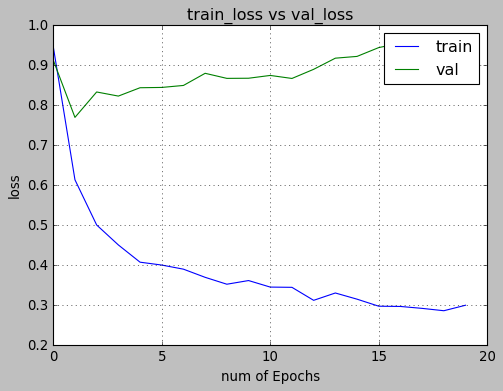

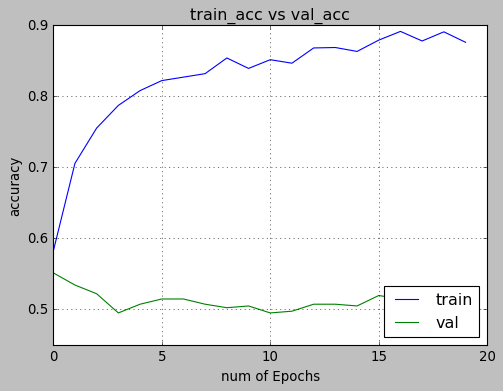

In [35]:
epochs = 20
train_loss = hist3.history['loss']
val_loss = hist3.history['val_loss']
train_acc = hist3.history['accuracy']
val_acc = hist3.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

### Custom Model:

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape = (48,48,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(256,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

## Predictions

In [6]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [ ]:
#visualize_training_results(results_1)

In [37]:
predictions = model.predict_generator(val_generator)

Instructions for updating:
Please use Model.predict, which supports generators.


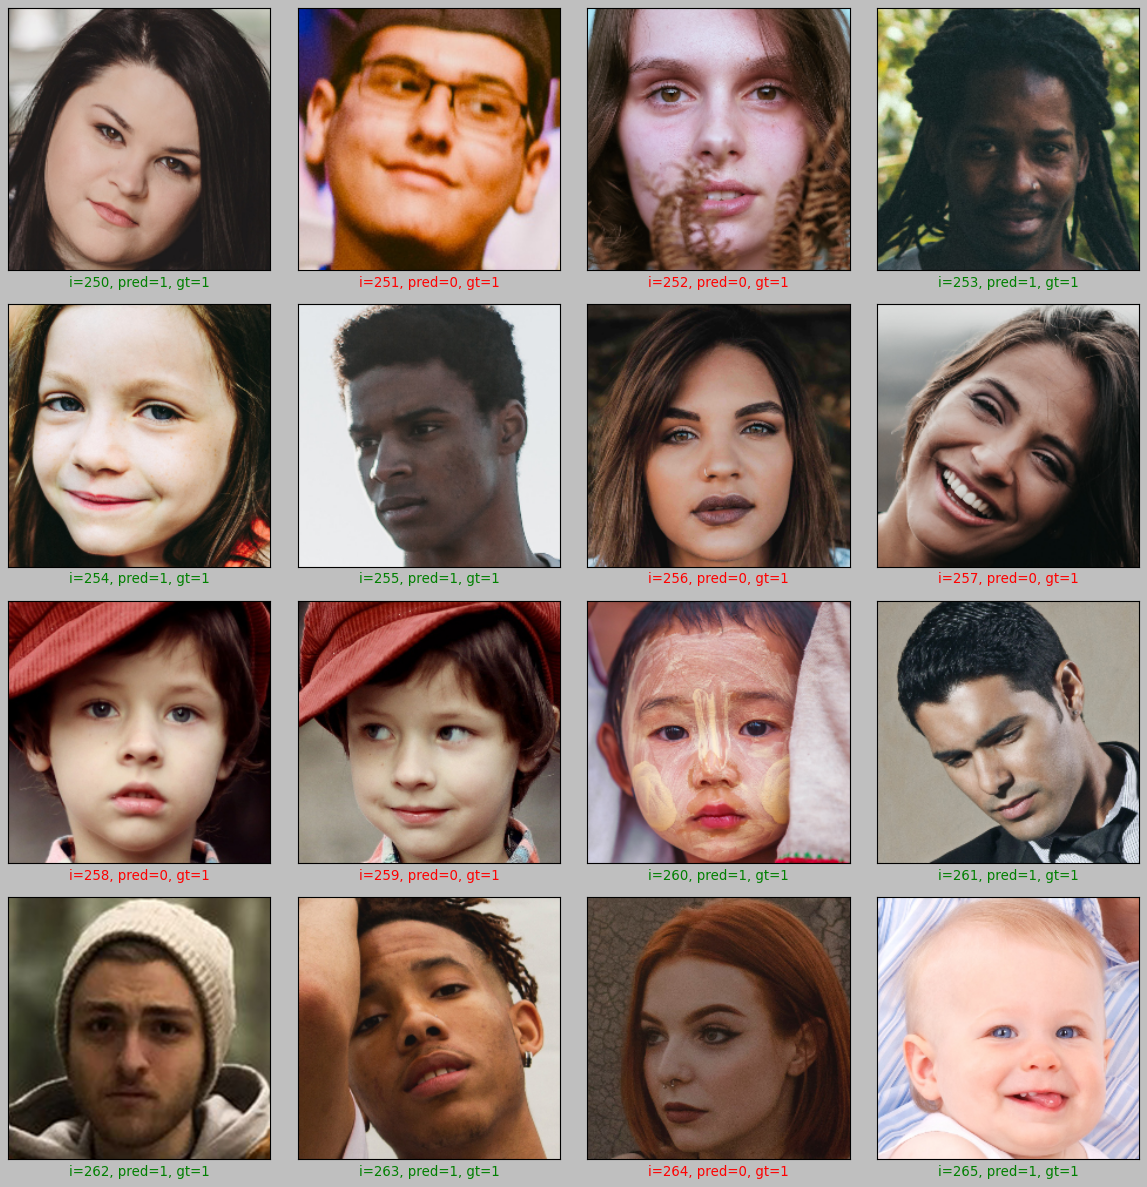

In [40]:
dataset_path
plt.figure(figsize=(15,15))

start_index = 250

for i in range(16):
  plt.subplot(4,4, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  preds = np.argmax(predictions[[start_index+i]])
    
  gt = val_generator.filenames[start_index+i][9:13]

  
  if gt == "fake":
    gt = 0
  else:
    gt = 1
    
  if preds != gt:
    col ="r"
  else:
    col = "g"

  plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i,preds,gt),color=col)
  plt.imshow(load_img(dataset_path+val_generator.filenames[start_index+i]))
  plt.tight_layout()

plt.show()